## Time Series Analysis of Apple Dataset

Import Library

In [1]:
# import packages and alias
import numpy as np # data arrays
import pandas as pd # data structure and data analysis
import matplotlib as plt # data visualization
import matplotlib.pyplot as plt
import datetime as dt # date time
import seaborn as sns
#import warnings
#warnings.filterwarnings("ignore")
%matplotlib inline
sns.set_theme()
pd.set_option('display.max_columns', None)
import math

In [2]:
pip install yfinance

In [3]:
import yfinance as yf

Importing Data set

In [4]:
AAL_df = yf.download(tickers='AAPL', period = '5y', interval = '1d')

[*********************100%***********************]  1 of 1 completed


In [5]:
AAL_df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-07-21,37.497501,37.610001,37.220001,37.567501,35.563877,105010400
2017-07-24,37.645000,38.110001,37.474998,38.022499,35.994610,85972800
2017-07-25,37.950001,38.459999,37.950001,38.185001,36.148445,75415600
2017-07-26,38.337502,38.482498,38.264999,38.365002,36.318840,63124000
2017-07-27,38.437500,38.497501,36.825001,37.639999,35.632511,129905200
...,...,...,...,...,...,...
2022-07-14,144.080002,148.949997,143.250000,148.470001,148.470001,78140700
2022-07-15,149.779999,150.860001,148.199997,150.169998,150.169998,76030800
2022-07-18,150.740005,151.570007,146.699997,147.070007,147.070007,81420900


EDA

In [6]:
AAL_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1258 entries, 2017-07-21 to 2022-07-20
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       1258 non-null   float64
 1   High       1258 non-null   float64
 2   Low        1258 non-null   float64
 3   Close      1258 non-null   float64
 4   Adj Close  1258 non-null   float64
 5   Volume     1258 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 68.8 KB


In [7]:
AAL_df.index

DatetimeIndex(['2017-07-21', '2017-07-24', '2017-07-25', '2017-07-26',
               '2017-07-27', '2017-07-28', '2017-07-31', '2017-08-01',
               '2017-08-02', '2017-08-03',
               ...
               '2022-07-07', '2022-07-08', '2022-07-11', '2022-07-12',
               '2022-07-13', '2022-07-14', '2022-07-15', '2022-07-18',
               '2022-07-19', '2022-07-20'],
              dtype='datetime64[ns]', name='Date', length=1258, freq=None)

In [8]:
AAL_df.columns

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

<AxesSubplot:xlabel='Date'>

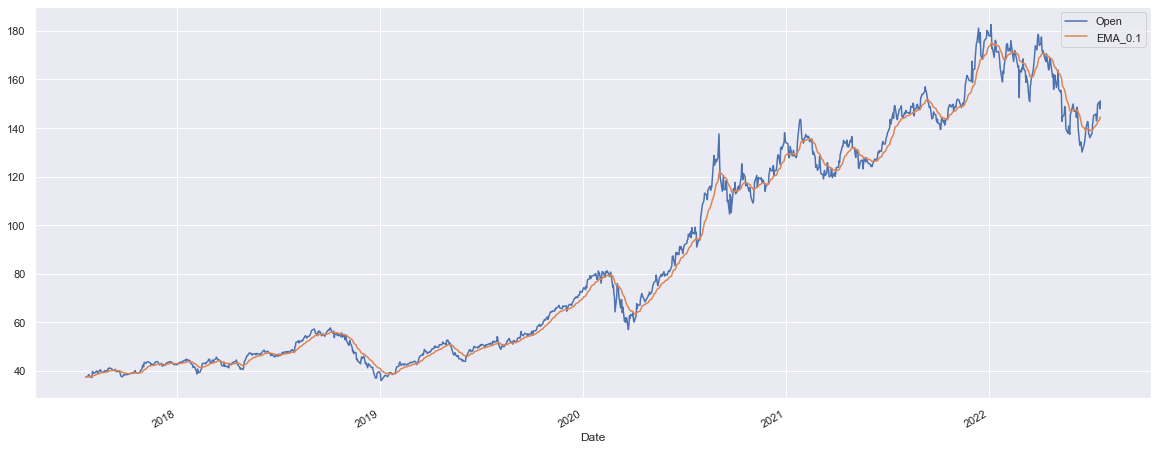

In [9]:
#Exponential moving average it removes lags
#alpha=smoothning factor 
AAL_df['EMA_0.1']=AAL_df['Open'].ewm(alpha=0.1,adjust=False).mean()
AAL_df[['Open','EMA_0.1']].plot(figsize=(20,8))

 
 ARIMA 
 AR=Auto regression+MA=moving average =ARMA model used for forecasting 

<AxesSubplot:xlabel='Date'>

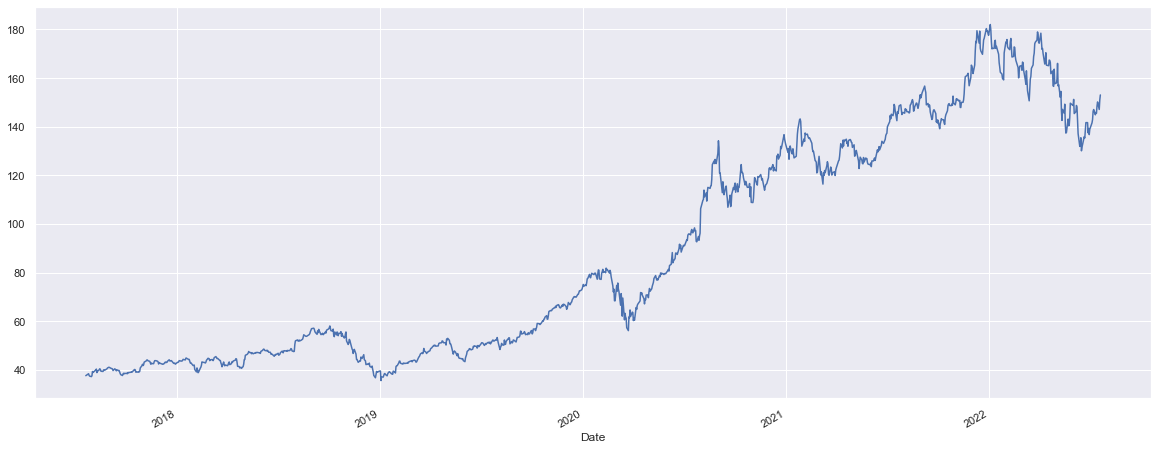

In [10]:
AAL_df['Close'].plot(figsize=(20,8))

In [11]:
from statsmodels.tsa.stattools import adfuller

In [12]:
def adf_test(series):
  result=adfuller(series)
  print('ADF Statistics:{}'.format(result[0]))
  print('p-value:{}'.format(result[1]))
  if result[1]<=0.05:
    print('Data is stationary')
  else:
    print('Data is not stationary')

In [13]:
adf_test(AAL_df['Close'])

ADF Statistics:-0.380019491160849
p-value:0.9133817364417737
Data is not stationary


Differecing method in order to make data stationary

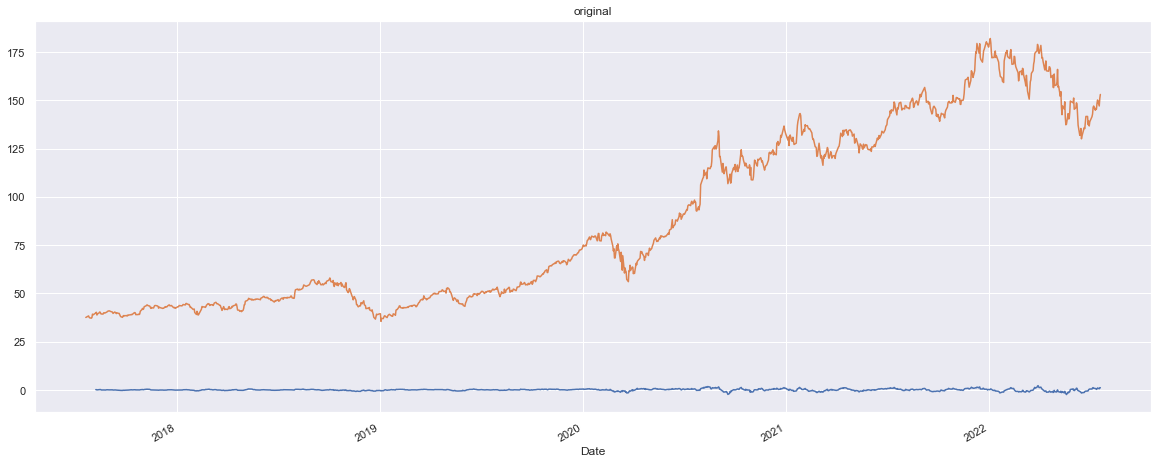

In [23]:
#rolling_mean =AAL_df['Close'].rolling(window = 12).mean()
#AAL_df['rolling_mean_diff'] = rolling_mean - rolling_mean.shift()
#ax1 = plt.subplot()
#AAL_df['rolling_mean_diff'].plot(title='after rolling mean & differencing');
#ax2 = plt.subplot()
#AAL_df['Close'].plot(title='original',figsize=(20,8));

In [25]:
AAL_df['Close_first']=AAL_df['Close']-AAL_df['Close'].shift(1)
AAL_df.head()

,Open,High,Low,Close,Adj Close,Volume,EMA_0.1,rolling_mean_diff,Close_first
Date,,,,,,,,,
2017-07-21,37.497501,37.610001,37.220001,37.567501,35.563877,105010400,37.497501,NaN,NaN
2017-07-24,37.645000,38.110001,37.474998,38.022499,35.994610,85972800,37.512251,NaN,0.454998
2017-07-25,37.950001,38.459999,37.950001,38.185001,36.148445,75415600,37.556026,NaN,0.162502
2017-07-26,38.337502,38.482498,38.264999,38.365002,36.318840,63124000,37.634174,NaN,0.180000
2017-07-27,38.437500,38.497501,36.825001,37.639999,35.632511,129905200,37.714506,NaN,-0.725002


In [29]:
adf_test(AAL_df['Close_first'].dropna())

ADF Statistics:-13.176111657590662
p-value:1.2223938758577783e-24
Data is stationary


In [30]:
#dftest = adfuller(AAL_df['rolling_mean_diff'].dropna(), autolag = 'AIC')
#print("1. ADF : ",dftest[0])
#print("2. P-Value : ", dftest[1])
#print("3. Num Of Lags : ", dftest[2])
#print("4. Num Of Observations Used For ADF Regression and Critical Values Calculation :", dftest[3])
#print("5. Critical Values :")
#for key, val in dftest[4].items():
 # print("\t",key, ": ", val)

In [31]:
##p value calculated by pacf
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

<Figure size 1296x576 with 0 Axes>

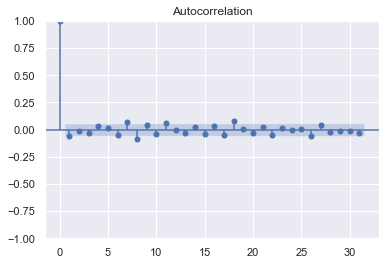

In [32]:
plt.figure(figsize=(18,8))
acf=plot_acf(AAL_df['Close_first'].dropna())

C:\Users\tanma\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


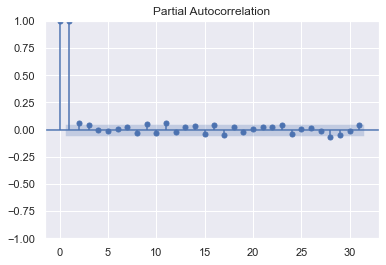

In [33]:
pacf = plot_pacf(AAL_df["Close"].dropna())

In [34]:
import itertools
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
#print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX1: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX2: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX3: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX4: {} x {}'.format(pdq[2], seasonal_pdq[4]))

SARIMAX1: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX2: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX3: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX4: (0, 1, 0) x (1, 0, 0, 12)


In [35]:
pdq

[(0, 0, 0),
 (0, 0, 1),
 (0, 1, 0),
 (0, 1, 1),
 (1, 0, 0),
 (1, 0, 1),
 (1, 1, 0),
 (1, 1, 1)]

In [36]:
seasonal_pdq

[(0, 0, 0, 12),
 (0, 0, 1, 12),
 (0, 1, 0, 12),
 (0, 1, 1, 12),
 (1, 0, 0, 12),
 (1, 0, 1, 12),
 (1, 1, 0, 12),
 (1, 1, 1, 12)]

In [37]:
AAL_df_final=AAL_df['Close_first'].dropna()

In [38]:
AAL_df_final

Date
2017-07-24    0.454998
2017-07-25    0.162502
2017-07-26    0.180000
2017-07-27   -0.725002
2017-07-28   -0.264999
                ...   
2022-07-14    2.979996
2022-07-15    1.699997
2022-07-18   -3.099991
2022-07-19    3.929993
2022-07-20    2.039993
Name: Close_first, Length: 1257, dtype: float64

In [39]:
aal = AAL_df_final.resample('M').mean()
aal

Date
2017-07-31   -0.064167
2017-08-31    0.165978
2017-09-30   -0.123500
2017-10-31    0.169545
2017-11-30    0.033453
                ...   
2022-03-31    0.412609
2022-04-30   -0.848000
2022-05-31   -0.419524
2022-06-30   -0.577143
2022-07-31    1.255384
Freq: M, Name: Close_first, Length: 61, dtype: float64

In [40]:
aal.isnull().sum()

0

<AxesSubplot:xlabel='Date'>

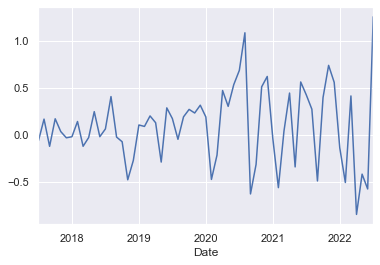

In [41]:
aal.plot()

In [42]:
adf_test(aal)

ADF Statistics:-2.5215639600259068
p-value:0.11031534762696615
Data is not stationary


In [43]:
#White Noise Detection:

import statsmodels.stats.diagnostic as diag
diag.acorr_ljungbox(AAL_df_final, lags=20)

,lb_stat,lb_pvalue
1,4.795325,0.028537
2,4.958937,0.083788
3,6.041292,0.109618
4,7.725328,0.102174
5,7.997150,0.156393
6,11.479407,0.074643
7,17.340977,0.015325
8,27.383528,0.000607
9,30.067428,0.000427
10,32.176781,0.000374


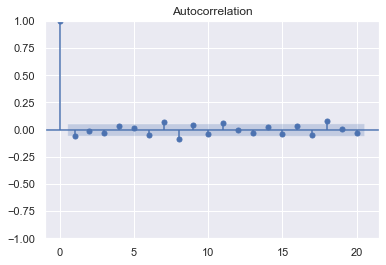

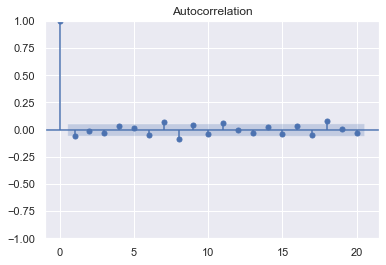

In [44]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
plot_acf(AAL_df_final,lags=20)

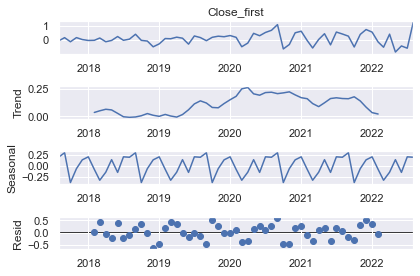

In [45]:
from pylab import rcParams
import statsmodels.api as sm
decomposition = sm.tsa.seasonal_decompose(aal, model='additive')
fig = decomposition.plot()
plt.show()

In [48]:
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(aal,
                                            order=param,
                                            seasonal_order=param_seasonal,enforce_stationarity=False,
                                            enforce_invertibility=False)
            results = mod.fit()
            
            print('SARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

SARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:68.17311751542543
SARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:63.764676254917866
SARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:70.22228380238622


C:\Users\tanma\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:62.591354363987854
SARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:62.51044765287072
SARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:64.22775240994443
SARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:56.078000460239664
SARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:57.29983179161247
SARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:69.00513681004686
SARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:63.97896294492455
SARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:71.51949097921377


C:\Users\tanma\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:63.35838898654646
SARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:64.32068364410341
SARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:65.29804619614518
SARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:57.88333868960022
SARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:58.30701332300992
SARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:98.12159106898059
SARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:88.52273035980258
SARIMA(0, 1, 0)x(0, 1, 0, 12)12 - AIC:99.64374560467841


C:\Users\tanma\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 1, 0)x(0, 1, 1, 12)12 - AIC:1272.3763490841811
SARIMA(0, 1, 0)x(1, 0, 0, 12)12 - AIC:89.22034533511547
SARIMA(0, 1, 0)x(1, 0, 1, 12)12 - AIC:90.1849843133848
SARIMA(0, 1, 0)x(1, 1, 0, 12)12 - AIC:76.9519122184189
SARIMA(0, 1, 0)x(1, 1, 1, 12)12 - AIC:1313.8159366404266
SARIMA(0, 1, 1)x(0, 0, 0, 12)12 - AIC:70.17380963141429
SARIMA(0, 1, 1)x(0, 0, 1, 12)12 - AIC:66.05817832053313
SARIMA(0, 1, 1)x(0, 1, 0, 12)12 - AIC:74.14123065797759


C:\Users\tanma\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 1, 1)x(0, 1, 1, 12)12 - AIC:1582.228021863611
SARIMA(0, 1, 1)x(1, 0, 0, 12)12 - AIC:66.99603487454908
SARIMA(0, 1, 1)x(1, 0, 1, 12)12 - AIC:67.54913906515279
SARIMA(0, 1, 1)x(1, 1, 0, 12)12 - AIC:60.800752935279526


C:\Users\tanma\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\tanma\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 1, 1)x(1, 1, 1, 12)12 - AIC:1436.287008742763
SARIMA(1, 0, 0)x(0, 0, 0, 12)12 - AIC:69.58644499796529
SARIMA(1, 0, 0)x(0, 0, 1, 12)12 - AIC:65.54257438130455
SARIMA(1, 0, 0)x(0, 1, 0, 12)12 - AIC:72.18581897525213


C:\Users\tanma\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 0, 0)x(0, 1, 1, 12)12 - AIC:64.62988203112178
SARIMA(1, 0, 0)x(1, 0, 0, 12)12 - AIC:64.12840144700144
SARIMA(1, 0, 0)x(1, 0, 1, 12)12 - AIC:66.09153267161786
SARIMA(1, 0, 0)x(1, 1, 0, 12)12 - AIC:57.37689392270653
SARIMA(1, 0, 0)x(1, 1, 1, 12)12 - AIC:59.19274963177395
SARIMA(1, 0, 1)x(0, 0, 0, 12)12 - AIC:70.86067412738063
SARIMA(1, 0, 1)x(0, 0, 1, 12)12 - AIC:65.91420570209004
SARIMA(1, 0, 1)x(0, 1, 0, 12)12 - AIC:73.2799050820993


C:\Users\tanma\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 0, 1)x(0, 1, 1, 12)12 - AIC:65.76263964458977
SARIMA(1, 0, 1)x(1, 0, 0, 12)12 - AIC:66.08495049174172
SARIMA(1, 0, 1)x(1, 0, 1, 12)12 - AIC:67.28151521759537
SARIMA(1, 0, 1)x(1, 1, 0, 12)12 - AIC:59.4022501134872
SARIMA(1, 0, 1)x(1, 1, 1, 12)12 - AIC:59.8506544073707
SARIMA(1, 1, 0)x(0, 0, 0, 12)12 - AIC:94.39885553379413
SARIMA(1, 1, 0)x(0, 0, 1, 12)12 - AIC:84.94349194670622
SARIMA(1, 1, 0)x(0, 1, 0, 12)12 - AIC:93.09958995911185


C:\Users\tanma\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\tanma\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\tanma\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 0)x(0, 1, 1, 12)12 - AIC:1241.3344924905064
SARIMA(1, 1, 0)x(1, 0, 0, 12)12 - AIC:84.26229151514599
SARIMA(1, 1, 0)x(1, 0, 1, 12)12 - AIC:86.20228756957721
SARIMA(1, 1, 0)x(1, 1, 0, 12)12 - AIC:72.07428125544541


C:\Users\tanma\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 0)x(1, 1, 1, 12)12 - AIC:1091.0196533065357
SARIMA(1, 1, 1)x(0, 0, 0, 12)12 - AIC:71.93338960514569
SARIMA(1, 1, 1)x(0, 0, 1, 12)12 - AIC:67.92274270141937
SARIMA(1, 1, 1)x(0, 1, 0, 12)12 - AIC:76.0823239991743


C:\Users\tanma\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 1)x(0, 1, 1, 12)12 - AIC:1355.5968616345635
SARIMA(1, 1, 1)x(1, 0, 0, 12)12 - AIC:68.6906454891278
SARIMA(1, 1, 1)x(1, 0, 1, 12)12 - AIC:69.44200063757589
SARIMA(1, 1, 1)x(1, 1, 0, 12)12 - AIC:61.07710227339848
SARIMA(1, 1, 1)x(1, 1, 1, 12)12 - AIC:1209.656091603171


C:\Users\tanma\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [49]:
model=sm.tsa.statespace.SARIMAX(aal,order=(0,0,0),seasonal_order=(1,1,0,12))
results=model.fit()

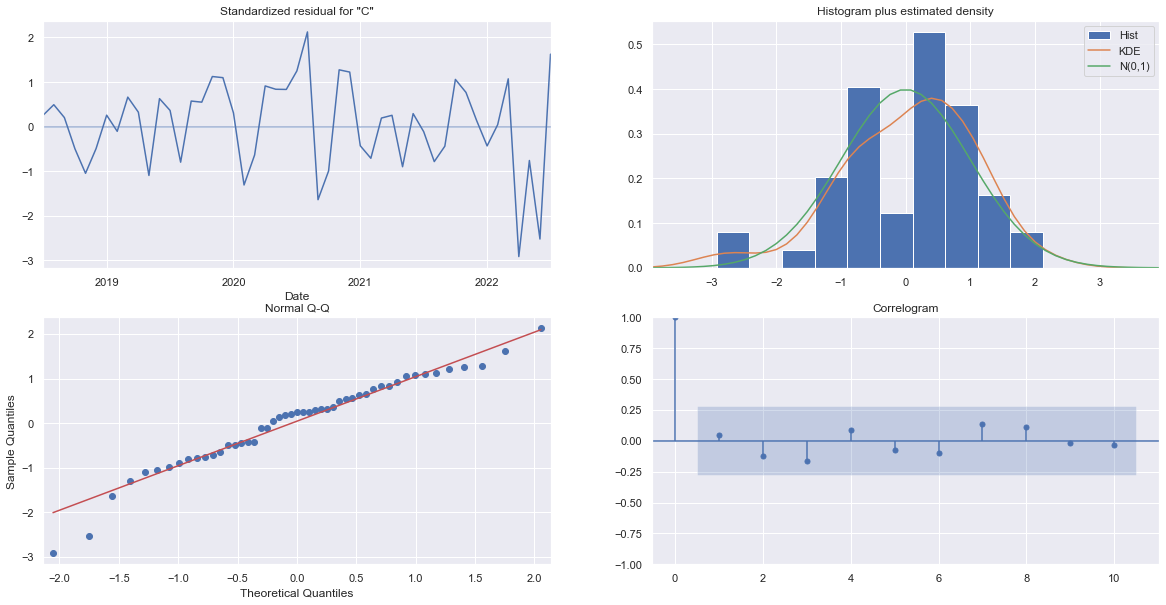

In [50]:
results.plot_diagnostics(figsize=(20, 10))
plt.show()

In [51]:
print(results.summary())

                                SARIMAX Results                                 
Dep. Variable:              Close_first   No. Observations:                   61
Model:             SARIMAX(1, 1, 0, 12)   Log Likelihood                 -31.110
Date:                  Thu, 21 Jul 2022   AIC                             66.220
Time:                          03:16:26   BIC                             70.004
Sample:                      07-31-2017   HQIC                            67.656
                           - 07-31-2022                                         
Covariance Type:                    opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.S.L12      -0.4081      0.186     -2.193      0.028      -0.773      -0.043
sigma2         0.1994      0.037      5.436      0.000       0.127       0.271
Ljung-Box (L1) (Q):                 